In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import os
import sys
sys.path.append(os.getcwd() + '/src')
import data_cleaning_eda as dce

%matplotlib inline
plt.style.use('ggplot')

# Data Wrangling

## Loading Data to a Pandas DataFrame

In [2]:
# Load data to dataframe
data_file = 'data/cscpopendata.csv'
data_df = pd.read_csv(data_file)
# Get dataframe shape
data_df.shape

(113780, 22)

In [3]:
# Preview top of dataframe
data_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
# Preview bottom of dataframe
data_df.tail()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
113775,41351,DP NAIL POLISH ART KIT 18PC,64680.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67737,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113776,41352,DP NAIL POLISH 4PC METALLIC,64681.0,TRANSPARENT - N - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67738,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113777,41353,DP EYESHADOW 44 SHADE CUBE,64682.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67739,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113778,41354,DP EYESHADOW PURSE,64683.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67740,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113779,41355,DP NAIL POLISH GEL LIKE 4PC,64684.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,59,Nail Products,65,...,13463-67-7,67741,Titanium dioxide,04/01/2020,04/01/2020,NaN,04/01/2020,04/01/2020,NaN,1


In [5]:
# Get column info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113568 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null object
MostRecentDateReported    113780 non-null object
DiscontinuedDate          12906 non-null object
ChemicalCreated

## Handling Null Values

In [6]:
# Show cols with null vals & how many they have
print('Columns with Null Values:')
null_count = data_df.isna().sum()
null_count_df = null_count[null_count > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Columns with Null Values:


,Column,Number of Null Values
5,ChemicalDateRemoved,110848
4,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
3,CasNumber,6316
2,BrandName,212


In [7]:
# Replace all null BrandName values with 'Missing'
data_df2 = data_df.copy()
data_df2.loc[data_df2['BrandName'].isna()==True, 'BrandName'] = 'Missing'

In [8]:
# Updated - Show updated cols with null vals & how many they have
print('Remaining columns with Null Values:')
null_count2 = data_df2.isna().sum()
null_count2_df = null_count2[null_count2 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count2_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Remaining columns with Null Values:


,Column,Number of Null Values
4,ChemicalDateRemoved,110848
3,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
2,CasNumber,6316


### Remaining Columns with Null Values
* ChemicalDateRemoved 
    * **KEEP**, non-null for **reformulated products** only
    * If applicable, date the chemical was removed from product, i.e., reformulation.
* DiscontinuedDate
    * **KEEP**, non-null for **discontinued products** only
    * If applicable, date the product was discontinued.
* CSF 
    * *DROP COLUMN*
    * Color, scent and/or flavor as entered by manufacturer, packer and/or distributor. The color/scent/flavor name is entered as free-text into the reporting database and may contain misspellings or other errors. **Not all products have specific colors, scents or flavors.**
* CSFId
    * *DROP COLUMN*
    * CDPH internal identification number for a color/scent/flavor. **Like CSF, not all products have CSFId.**
* CasNumber
    * *DROP COLUMN* 
    * **Refer to 'CasId'/'ChemicalName' columns instead**
    * Chemical identification number (Chemical Abstracts Service registry number assigned to specific chemical). Note that different forms of a chemical  may have different CAS numbers. What appears here is the CAS number selected by the manufacturer, packer and/or distributor. 

In [9]:
# Check if can indeed refer to 'CasId'/'ChemicalName' columns instead of CasNumber
data_df2[data_df2['CasNumber'].isna()==True][['CasId', 'ChemicalId', 'ChemicalName']]

,CasId,ChemicalId,ChemicalName
49,162,43,Cocamide diethanolamine
62,730,52,Chromium (hexavalent compounds)
432,773,1875,"Retinol/retinyl esters, when in daily dosages ..."
433,773,1876,"Retinol/retinyl esters, when in daily dosages ..."
500,773,453,"Retinol/retinyl esters, when in daily dosages ..."
...,...,...,...
113774,1191,67736,Isopropyl alcohol manufacture using strong acids
113775,1191,67737,Isopropyl alcohol manufacture using strong acids
113776,1191,67738,Isopropyl alcohol manufacture using strong acids
113777,759,67739,"Mineral oils, untreated and mildly treated"


In [10]:
# Drop 4 unnecessary columns
data_df3 = data_df2.copy()
data_df3 = data_df2.drop(columns=['CSF', 'CSFId', 'CasNumber', 'ChemicalId'])
data_df3.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [11]:
# Updated - Show final cols with null vals & how many they have
print('Final columns with Null Values:')
null_count3 = data_df3.isna().sum()
null_count3_df = null_count3[null_count3 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count3_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Final columns with Null Values:


,Column,Number of Null Values
1,ChemicalDateRemoved,110848
0,DiscontinuedDate,100874


## Converting Date Str Columns to Date-Time Type

In [12]:
date_cols = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 
             'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']
data_df4 = data_df3.copy()

data_df4[date_cols] = data_df4[date_cols].apply(pd.to_datetime)

data_df4.info()
data_df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 18 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113780 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null datetime64[ns]
MostRecentDateReported    113780 non-null datetime64[ns]
DiscontinuedDate          12906 non-null datetime64[ns]
ChemicalCreatedAt         113780 non-null datetime64[ns]
ChemicalUpdatedAt         113780 non-null datetime64[ns]
ChemicalDateRemoved       2932 non-null datetime64[ns]
ChemicalCount   

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


## Initial Check for Duplicate Rows

In [13]:
# Find number of duplicate rows
duplicates_df = data_df4[data_df4.duplicated()]
duplicates_df.shape

(66853, 18)

In [14]:
# Drop duplicate rows
data_df5 = data_df4.copy()
data_df5 = data_df5.drop_duplicates()
data_df5.shape

(46927, 18)

## Counting Unique Values per Column

In [15]:
# Show number of unique vals per column
print('Number of Unique Values per Column:')
num_unique_df = data_df5.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
0,CDPHId,36794
1,ProductName,33565
4,BrandName,2706
15,ChemicalUpdatedAt,2283
14,ChemicalCreatedAt,2277
11,InitialDateReported,2232
12,MostRecentDateReported,2134
13,DiscontinuedDate,986
2,CompanyId,633
3,CompanyName,604


## Handling Categorical Data

* 36,794 unique products identified by CDPHId, *IGNORE ProductName*
    * Number of unique CDPHId vals > Number of unique ProductName vals
    * Can have multiple categories (PrimaryCategory, SubCategory) 
    * Can have multiple chemicals (ChemicalName)
* 123 unique chemicals identified by ChemicalName, *IGNORE CasId*
    * Number of unique CasId vals > Number of unique ChemicalName vals
* Need to investigate:
    * **Number of unique CompanyId vals > Number of unique CompanyName vals**
    * Number of unique SubCategoryId vals > Number of unique SubCategory vals

#### Messy Company Names

In [16]:
# Show CompanyName counts
# df = pd.DataFrame(data_df5['CompanyName'].value_counts()).reset_index().sort_values('index')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [17]:
# Example of similar CompanyNames that could be merged - 'Fresh'
fresh_df = data_df5[data_df5['CompanyName'].str.contains('Fresh')]
fresh_df[['CompanyId','CompanyName','BrandName']].drop_duplicates()

,CompanyId,CompanyName,BrandName
36890,570,"Fresh, Inc.",Fresh
51907,843,Fresh Inc.,Fresh
89347,1215,Fresh Inc,Fresh


### Replacing Categorical Columns with Cleaned Ones

In [18]:
# Use function to clean categorical columns of interest
data_df6 = dce.clean_cat_data(data_df5, ['CompanyName', 'ProductName', 'SubCategory', 
                                         'BrandName'])
data_df6.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
1,3,338,18,Hair Care Products (non-coloring),25,889,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2,j strickland & co,glover's medicated shampoo,hair shampoos (making a cosmetic claim),glover's
2,3,338,18,Hair Care Products (non-coloring),25,293,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2,j strickland & co,glover's medicated shampoo,hair shampoos (making a cosmetic claim),glover's
3,4,4,44,Makeup Products (non-permanent),46,656,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1,new avon llc,precision glimmer eye liner-all shades �,eyeliner/eyebrow pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon


In [19]:
# # Show Cleaned CompanyName counts - Sorted by name
# df = pd.DataFrame(data_df6['Cleaned_CompanyName'].value_counts()).reset_index().sort_values('index')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [20]:
# # Show Cleaned CompanyName counts - Sorted by count, descending
# df = pd.DataFrame(data_df6['Cleaned_CompanyName'].value_counts()).reset_index().sort_values('Cleaned_CompanyName', ascending=False)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [21]:
# Same example of CompanyNames after cleaning - 'Fresh'
fresh_df6 = data_df6[data_df6['Cleaned_CompanyName'].str.contains('fresh')]
fresh_df6[['CompanyId','Cleaned_CompanyName','Cleaned_BrandName']].drop_duplicates()

,CompanyId,Cleaned_CompanyName,Cleaned_BrandName
36890,570,fresh inc,fresh
51907,843,fresh inc,fresh
89347,1215,fresh inc,fresh


In [22]:
# # Updated - Show number of unique vals per column
# print('Number of Unique Values per Column:')
# num_unique_df = data_df6.nunique(axis=0).to_frame().reset_index()
# num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

## Final Check for Duplicate Rows

In [23]:
# Find number of duplicate rows
duplicates_df6 = data_df6[data_df6.duplicated()]
duplicates_df6.shape

(0, 18)

In [24]:
# Drop duplicate rows
# N/A

In [25]:
# Take final df after cleaning
clean_data_df = data_df6

# EDA

* 36,794 unique products identified by CDPHId
    * Can have multiple categories (PrimaryCategory, SubCategory) 
    * Can have multiple chemicals (ChemicalName)
* 123 unique chemicals identified by ChemicalName

In [26]:
# Number of unique vals per column
print('Number of Unique Values per Column:')
num_unique_df = clean_data_df.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
0,CDPHId,36794
15,Cleaned_ProductName,33296
17,Cleaned_BrandName,2384
11,ChemicalUpdatedAt,2283
10,ChemicalCreatedAt,2277
7,InitialDateReported,2232
8,MostRecentDateReported,2134
9,DiscontinuedDate,986
1,CompanyId,633
14,Cleaned_CompanyName,597


In [27]:
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46927 entries, 0 to 113779
Data columns (total 18 columns):
CDPHId                    46927 non-null int64
CompanyId                 46927 non-null int64
PrimaryCategoryId         46927 non-null int64
PrimaryCategory           46927 non-null object
SubCategoryId             46927 non-null int64
CasId                     46927 non-null int64
ChemicalName              46927 non-null object
InitialDateReported       46927 non-null datetime64[ns]
MostRecentDateReported    46927 non-null datetime64[ns]
DiscontinuedDate          6047 non-null datetime64[ns]
ChemicalCreatedAt         46927 non-null datetime64[ns]
ChemicalUpdatedAt         46927 non-null datetime64[ns]
ChemicalDateRemoved       1619 non-null datetime64[ns]
ChemicalCount             46927 non-null int64
Cleaned_CompanyName       46927 non-null object
Cleaned_ProductName       46927 non-null object
Cleaned_SubCategory       46927 non-null object
Cleaned_BrandName         46927 no

## Analyzing by InitialDateReported

In [75]:
# Count number of products by InitialDateReported
init_date_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'InitialDateReported')
init_date_count_df

,CDPHId
InitialDateReported,
2009-06-17,1
2009-07-01,1
2009-07-09,3
2009-07-13,4
2009-07-14,6
...,...
2020-03-23,4
2020-03-25,8
2020-03-26,17


In [ ]:
x = chemical_count_df['ChemicalCount']
y = chemical_count_df['CDPHId']

fig, ax = plt.subplots(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x, y, log=True)
ax.set_title('Number of Products Per Chemical Count', fontsize=20)
ax.set_xlabel('Chemical Count', fontsize=15)
ax.set_ylabel('Number of Products (Log Scale)', fontsize=15)

for x_i, y_i in zip(x, y):
    ax.annotate(y_i, (x_i, y_i), textcoords="offset points", xytext=(0,4), ha='center')
 

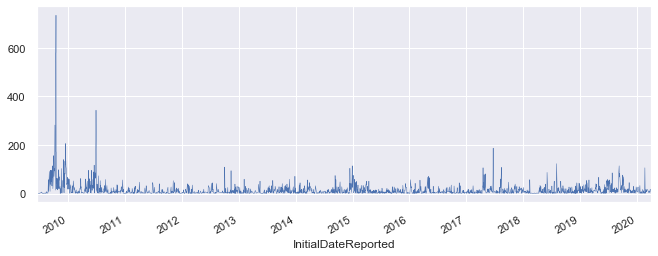

In [76]:
   
sns.set(rc={'figure.figsize':(11, 4)})
init_date_count_df['CDPHId'].plot(linewidth=0.5);

In [30]:
# Check for products with multiple InitialDateReported values
count_dupe_CDPHId = clean_data_df.drop_duplicates(['CDPHId','InitialDateReported'])
count_dupe_CDPHId = count_dupe_CDPHId['CDPHId'].value_counts()
mult_reported = count_dupe_CDPHId[count_dupe_CDPHId > 1]
print('Number of products with multiple InitialDateReported:', len(mult_reported))
mult_reported

Number of products with multiple InitialDateReported: 13


40190    5
36365    2
36362    2
37227    2
38726    2
36923    2
36902    2
38786    2
36357    2
36927    2
36367    2
36904    2
36364    2
Name: CDPHId, dtype: int64

In [31]:
# Example of products with multiple InitialDateReported values
clean_data_df[clean_data_df['CDPHId']==40190].sort_values('InitialDateReported').head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
110296,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110297,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110298,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110299,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2017-03-21,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110315,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury


In [32]:
clean_data_df[clean_data_df['CDPHId']==40190].sort_values('InitialDateReported').tail()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
110385,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-17,2019-10-23,NaT,2019-10-17,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110386,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2019-10-17,2019-10-23,NaT,2019-10-17,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110388,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-17,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110301,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-23,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,2,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110300,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2019-10-23,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,2,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury


## Analyzing Chemical Counts

In [54]:
# Count number of products by ChemicalCount
chemical_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'ChemicalCount')
chemical_count_df = chemical_count_df.reset_index().sort_values('CDPHId', ascending=False)
chemical_count_df

,ChemicalCount,CDPHId
1,1,32321
2,2,3684
0,0,598
3,3,350
4,4,85
5,5,10
7,7,4
8,8,4
6,6,2
9,9,1


Text(0.5, 1.0, 'Number of Products Per Chemical Count')

Text(0.5, 0, 'Chemical Count')

Text(0, 0.5, 'Number of Products (Log Scale)')

Text(0, 4, '32321')

Text(0, 4, '3684')

Text(0, 4, '598')

Text(0, 4, '350')

Text(0, 4, '85')

Text(0, 4, '10')

Text(0, 4, '4')

Text(0, 4, '4')

Text(0, 4, '2')

Text(0, 4, '1')

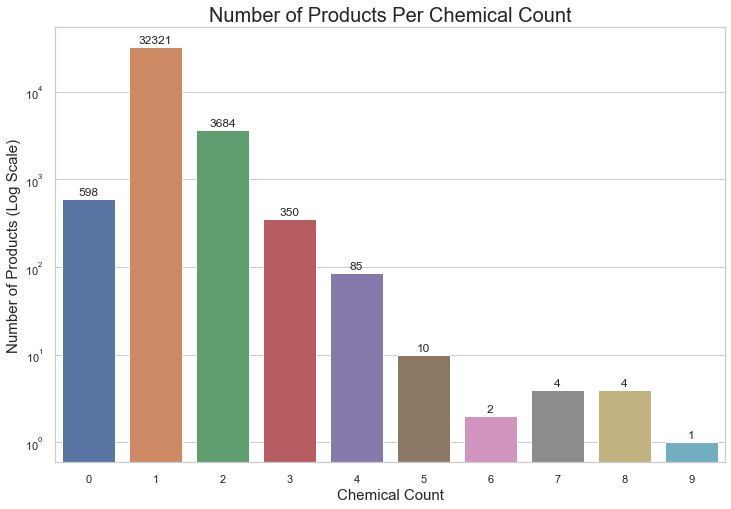

In [78]:
x = chemical_count_df['ChemicalCount']
y = chemical_count_df['CDPHId']

fig, ax = plt.subplots(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x, y, log=True)
ax.set_title('Number of Products Per Chemical Count', fontsize=20)
ax.set_xlabel('Chemical Count', fontsize=15)
ax.set_ylabel('Number of Products (Log Scale)', fontsize=15)

for x_i, y_i in zip(x, y):
    ax.annotate(y_i, (x_i, y_i), textcoords="offset points", xytext=(0,4), ha='center')
    
fig.savefig('images/num_products_per_chemical_count_barchart')

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=chemical_count_df['ChemicalCount'], y=chemical_count_df['CDPHId'])

### Investigate Product with 9 Chemicals

In [37]:
nine_chemicals_df = clean_data_df[clean_data_df['ChemicalCount'] == 9]
nine_chemicals_df
# Only 1 

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
60819,22212,165,18,Hair Care Products (non-coloring),25,270,"1,4-Dioxane",2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60820,22212,165,18,Hair Care Products (non-coloring),25,9,Acrylamide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60821,22212,165,18,Hair Care Products (non-coloring),25,715,Arsenic (inorganic arsenic compounds),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60822,22212,165,18,Hair Care Products (non-coloring),25,214,Dichloroacetic acid,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60823,22212,165,18,Hair Care Products (non-coloring),25,311,Ethylene oxide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60824,22212,165,18,Hair Care Products (non-coloring),25,333,Formaldehyde (gas),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60825,22212,165,18,Hair Care Products (non-coloring),25,388,Lead,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60826,22212,165,18,Hair Care Products (non-coloring),25,1007,Cocamide diethanolamine (DEA),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60827,22212,165,18,Hair Care Products (non-coloring),25,305,Ethylene glycol,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line


In [38]:
zero_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']==0]
zero_chemicals_df

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�
497,333,71,6,Bath Products,159,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2013-09-16,2009-11-23,0,sunrider manufacturing lp,gentle cleanser,body washes and soaps,kandesn
498,334,71,90,Skin Care Products,93,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2009-09-03,2009-09-02,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn
499,334,71,90,Skin Care Products,93,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2009-09-02,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn
500,334,71,90,Skin Care Products,93,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2103-12-05,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102967,37069,561,68,Oral Hygiene Products,69,1017,Polygeenan,2019-04-16,2019-04-16,NaT,2019-04-16,2019-04-16,2019-04-16,0,tom's of maine inc,tom's of maine natural activated charcoal whit...,teeth cleaning products,tom's of maine
103676,37289,171,32,Hair Coloring Products,33,1108,"Aloe vera, whole leaf extract",2019-05-02,2019-05-08,NaT,2019-05-02,2019-05-02,2019-05-02,0,coty,age defy cc+ colorseal,hair conditioners (leave-in),clairol
104205,37486,421,90,Skin Care Products,102,1045,Diethanolamine,2019-06-03,2019-06-10,NaT,2019-06-03,2019-06-10,2019-06-06,0,central solutions inc,recovery creme,skin moisturizers (making a cosmetic claim),boavida
104389,37537,333,90,Skin Care Products,102,986,Diethanolamides of the fatty acids of coconut oil,2019-06-11,2019-06-11,2019-06-11,2019-06-11,2019-06-11,2019-06-11,0,bioelements inc,barrier fix daily hydrator,skin moisturizers (making a cosmetic claim),bioelements


In [39]:
five_or_more_chemicals_list = [i for i in range(5,10)]
five_or_more_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']
                                          .isin(five_or_more_chemicals_list)]
five_or_more_chemicals_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
2555,862,18,90,Skin Care Products,92,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2556,862,18,90,Skin Care Products,92,656,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2557,862,18,90,Skin Care Products,92,754,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2558,862,18,90,Skin Care Products,92,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2559,862,18,90,Skin Care Products,92,656,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss


(array([279., 177., 110.,  35.,  71.,  10.,  11.,   6.,   3.,  68.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

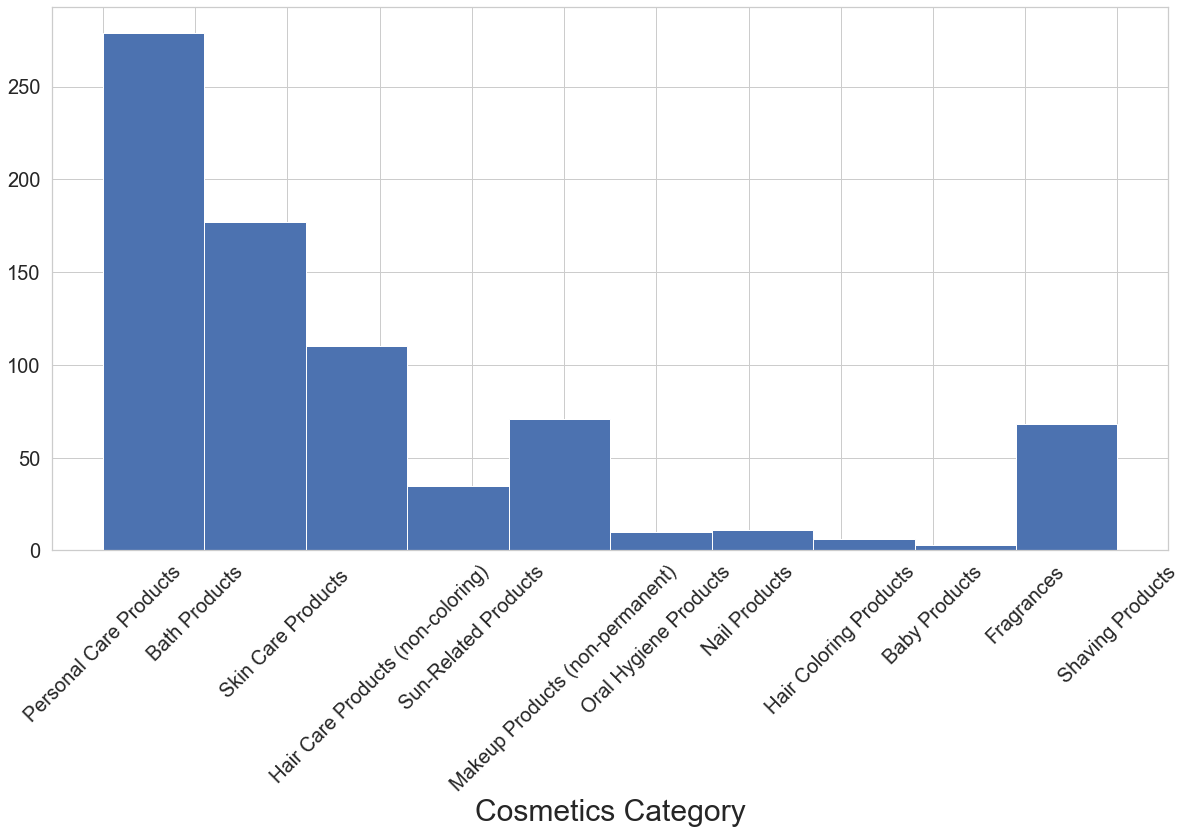

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(zero_chemicals_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Discontinued Products

In [41]:
discontinued_df = clean_data_df[clean_data_df['DiscontinuedDate'].isna()==False]
discontinued_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew


In [42]:
discontinued_df

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110044,40075,395,90,Skin Care Products,103,773,"Retinol/retinyl esters, when in daily dosages ...",2019-10-09,2019-10-09,2014-11-05,2019-10-09,2019-10-09,NaT,1,herbalife international of america inc,multivitamin toner with vitamins ac & e normal...,skin toner (making a cosmetic claim),nourifusion
110501,40251,1352,90,Skin Care Products,92,1242,Ethanol in alcoholic beverages,2019-10-30,2019-12-19,2019-12-01,2019-12-19,2019-12-19,NaT,1,sanmedica international llc,serovital complete eye area renewal complex,anti-wrinkle/anti-aging products (making a cos...,sanmedica international llc
111791,40743,784,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2019-12-30,2019-12-30,2018-01-01,2019-12-30,2019-12-30,NaT,1,soap and glory ltd,lid stuff eyeshadow palette,eye shadow,soap & glory
111805,40747,784,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,1,soap and glory ltd,sexy mother pucker mini gloss sticks - glossed...,lip gloss/shine,soap & glory


## Reformulated Products

In [43]:
reformulated_df = clean_data_df[clean_data_df['ChemicalDateRemoved'].isna()==False]
reformulated_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�
36,29,31,106,Sun-Related Products,107,656,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1,aloecare international llc,aloe up lil' kids spf 45 aloe based sunscreen ...,sunscreen (making a cosmetic claim),aloe up lil' kids spf 45 aloe based sunscreen ...
224,71,23,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1,revlon consumer product corporation,colorstay 12 hour eye shadow quad- rose shimme...,eye shadow,revlon
431,269,69,6,Bath Products,9,656,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden
432,269,69,6,Bath Products,9,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden


## Cosmetics Primary Categories

(array([24398.,  8265.,   482.,  2021.,  2730.,  7027.,   386.,   859.,
          504.,   255.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

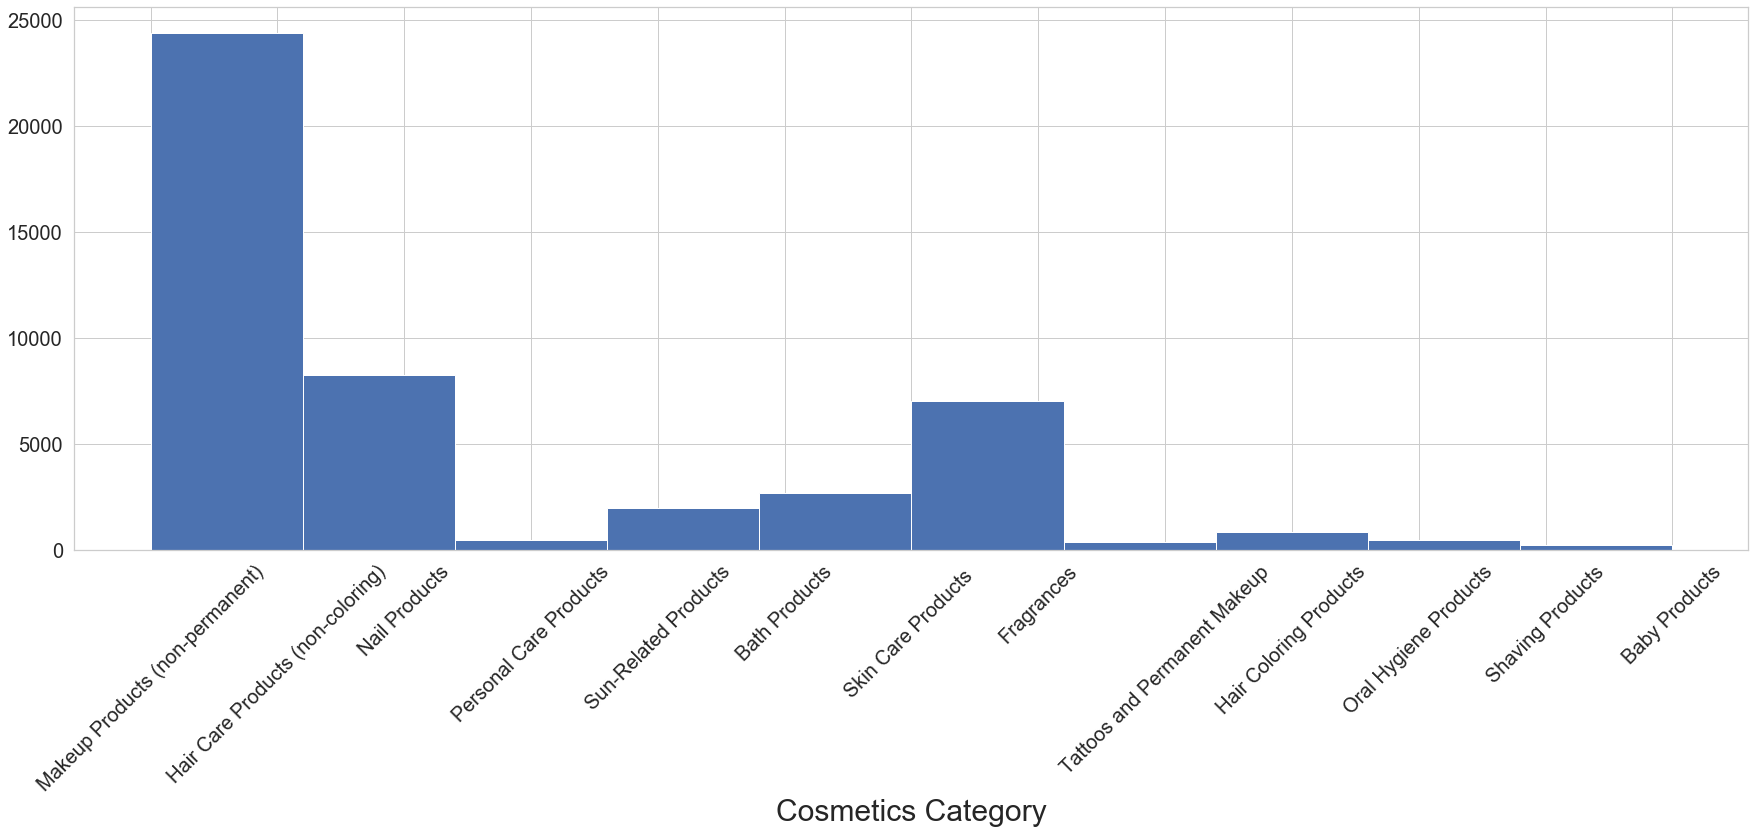

In [44]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(clean_data_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

In [45]:
clean_data_df['PrimaryCategory'].value_counts()

Makeup Products (non-permanent)      22883
Nail Products                         8265
Skin Care Products                    6532
Bath Products                         2730
Sun-Related Products                  2021
Hair Care Products (non-coloring)     1515
Hair Coloring Products                 859
Oral Hygiene Products                  504
Fragrances                             495
Personal Care Products                 482
Tattoos and Permanent Makeup           386
Shaving Products                       206
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [46]:
idxes = clean_data_df[clean_data_df['PrimaryCategory']=='Makeup Products (non-permanent)'].index

In [47]:
no_makeup_df = clean_data_df.drop(idxes)

(array([9780.,  482., 2021., 2730., 6532.,  495.,  386.,  859.,  504.,
         255.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

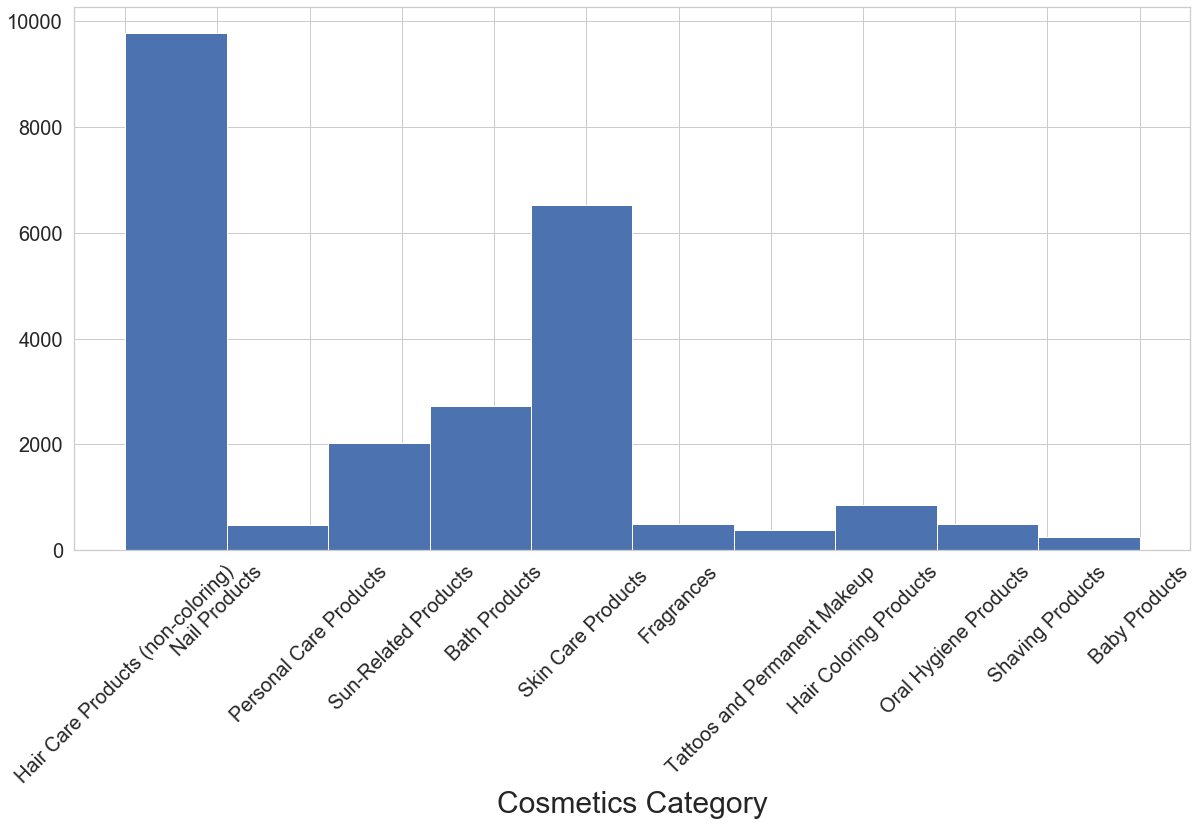

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(no_makeup_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()